# **1. Error Back Propagation with XOR**

===== Error Back Propagation with XOR =====
x1 : 1.0,   x2 : 1.0,   PRED : 0.01691670036665501
x1 : 1.0,   x2 : 0.0,   PRED : 0.9836777162403979
x1 : 0.0,   x2 : 1.0,   PRED : 0.9836455193856678
x1 : 0.0,   x2 : 0.0,   PRED : 0.018931160643638638


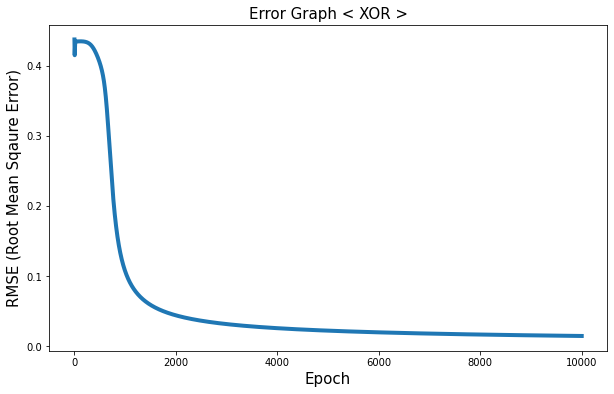

In [0]:
# Library
import numpy as np
import random

# Dataset
x = np.array([[1.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]])
y = np.array([[0.0, 1.0, 1.0, 0.0]])

# Error Back Propagation
def error_back_propagetion( x, y, epoch = 1000, lr=1e-3 ) : 

  # Init
  w11, w12, w13 = random.random(), random.random(), random.random()
  w21, w22, w23 = random.random(), random.random(), random.random()
  v11, v12, v13 = random.random(), random.random(), random.random()
  loss_list = []
  
  # Sigmoid
  def sigmoid ( x ) : 
    return 1 / (1 + np.exp(-x))
  
  # Temp Array
  ttt, ttt2 = np.zeros(shape=(len(x),6)), np.zeros(shape=(len(x),9))

  # Learning
  for step in range(epoch+1) : 

    # Forward Loop
    for i in range(len(x)) : 
      ttt[i,0], ttt[i,1] = w11*x[i,0] + w12*x[i,1] + w13*1, w21*x[i,0] + w22*x[i,1] + w23*1
      ttt[i,2], ttt[i,3] = sigmoid(ttt[i,0]), sigmoid(ttt[i,1])
      ttt[i,4] = v11*ttt[i,2] + v12*ttt[i,3] + v13*1
      ttt[i,5] = sigmoid(ttt[i,4])
 
    # Loss
    loss = 0
    for k in range(3) : 
      loss += ( y[0,k] - ttt[:,5][k] ) ** 2
    loss_list.append(np.sqrt(loss/4))

    # Backward Loop    
    for i in range(len(x)) :       

      # Diff Function (E_V)
      def E_V ( t, o, h ) : 
        return -1*(t-o)*o*(1-o)*h

      for q,w in zip([0,1,2], [1, ttt[i,3], ttt[i,2]]) : 
          ttt2[i,q] = E_V( y[0,i], o=ttt[i,5], h=w )
      
      for q,w in zip([3,4,5], [1, x[i,1], x[i,0]]) : 
            ttt2[i,q] = -1*w*ttt[i,3]*(1-ttt[i,3])*v12*(y[0,i]-ttt[i,5])*ttt[i,5]*(1-ttt[i,5])

      for q,w in zip([6,7,8], [1, x[i,1], x[i,0]]) : 
            ttt2[i,q] = -1*w*ttt[i,2]*(1-ttt[i,2])*v11*(y[0,i]-ttt[i,5])*ttt[i,5]*(1-ttt[i,5])

    # Update
    ttt3 = np.sum(ttt2, axis=0)
    v13,v12,v11 = v13-lr*ttt3[0], v12-lr*ttt3[1], v11-lr*ttt3[2]
    w23,w22,w21 = w23-lr*ttt3[3], w22-lr*ttt3[4], w21-lr*ttt3[5]
    w13,w12,w11 = w13-lr*ttt3[6], w12-lr*ttt3[7], w11-lr*ttt3[8]

  # Result
  print('===== Error Back Propagation with XOR =====')
  for n in range(4) : 
    print('x1 : {},   x2 : {},   PRED : {}' .format(x[n,0], x[n,1], ttt[:,5][n]))

  # Error Graph
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,6))
  plt.rcParams['lines.linewidth'] = 4
  plt.title('Error Graph < XOR >', fontsize=15)
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('RMSE (Root Mean Sqaure Error)', fontsize=15)
  plt.plot(loss_list) ; plt.show()
  
  # Return
  return None

# XOR with Error Back Propagation
error_back_propagetion( x, y, epoch=10000, lr=5e-1 )

# **2. Neural Network with &nbsp; $y=4x(1-x)$**

===== Error Back Propagation with function =====
x : [0.],	y:0.0,		PRED : 0.005067431432640607
x : [0.1],	y:0.36,		PRED : 0.35939047942311353
x : [0.2],	y:0.64,		PRED : 0.6408884746526206
x : [0.3],	y:0.84,		PRED : 0.8389095435564239
x : [0.4],	y:0.96,		PRED : 0.9633656522201303
x : [0.5],	y:1.0,		PRED : 0.9874478148177157
x : [0.6],	y:0.96,		PRED : 0.9684844635794351
x : [0.7],	y:0.84,		PRED : 0.8368855175554811
x : [0.8],	y:0.64,		PRED : 0.6422017190974547
x : [0.9],	y:0.36,		PRED : 0.35867917285555445
x : [1.],	y:0.0,		PRED : 0.007771659130383024

===== Un-learned data with function =====
x : [0.05],	y:[0.19],	PRED : 0.10729383947206261
x : [0.15],	y:[0.51],	PRED : 0.5320980630316265
x : [0.25],	y:[0.75],	PRED : 0.7401007878727186
x : [0.35],	y:[0.91],	PRED : 0.9181311072425923
x : [0.45],	y:[0.99],	PRED : 0.9821478031564734
x : [0.55],	y:[0.99],	PRED : 0.9845386302086306
x : [0.65],	y:[0.91],	PRED : 0.92263711519631
x : [0.75],	y:[0.75],	PRED : 0.7357978170890856
x : [0.85],	y:[0.5

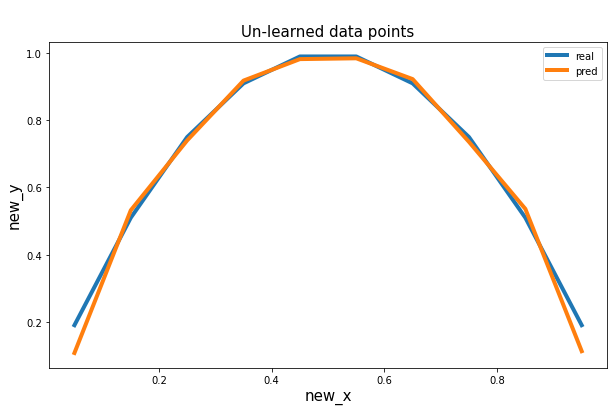

In [0]:
# Library
import numpy as np

# Dataset
x = np.array([[0.00], [0.10], [0.20], [0.30], [0.40], [0.50], [0.60], [0.70], [0.80], [0.90], [1.00]])
y = np.array([[0.00, 0.36, 0.64, 0.84, 0.96, 1.00, 0.96, 0.84, 0.64, 0.36, 0.00]])

# Error Back Propagation
def error_back_propagetion( x, y, epoch=100, learning_rate=1e-3 ) : 

  # Init
  import random
  w11, w12 = random.random(), random.random()
  w21, w22 = random.random(), random.random()
  w31, w32 = random.random(), random.random()
  w41, w42 = random.random(), random.random()
  v11, v12, v13, v14, v15 = random.random(), random.random(), random.random(), random.random(), random.random()

  # Sigmoid
  def sigmoid ( x ) : 
    return 1 / (1 + np.exp(-x))
  
  # Temp Array
  ttt = np.zeros(shape=(len(x),10))
  ttt2 = np.zeros(shape=(len(x),13))

  # Learning
  for step in range(epoch) : 

    # Forward Loop
    for i in range(len(x)) : 
      ttt[i,0], ttt[i,1], ttt[i,2], ttt[i,3] = w11*x[i,0]+w12*1, w21*x[i,0]+w22*1, w31*x[i,0]+w32*1, w41*x[i,0]+w42*1
      ttt[i,4], ttt[i,5],ttt[i,6], ttt[i,7] = sigmoid(ttt[i,0]), sigmoid(ttt[i,1]), sigmoid(ttt[i,2]), sigmoid(ttt[i,3])
      ttt[i,8] = v11*ttt[i,4] + v12*ttt[i,5] + v13*ttt[i,6] + v14*ttt[i,7] + v15*1
      ttt[i,9] = sigmoid(ttt[i,8])
    
    # Backward Loop    
    for i in range(len(x)) :       

      # Diff Function
      def E_V ( t, o, h ) : 
        return -1 * ( t - o ) * o * ( 1 - o ) * h

      for q,w in zip([0,1,2,3,4], [1, ttt[i,7], ttt[i,6], ttt[i,5], ttt[i,4]]) : 
        ttt2[i,q] = E_V( y[0,i], o=ttt[i,-1], h=w )

      ttt2[i,5] = -1 * ttt[i,7] * ( 1 - ttt[i,7]) * v14 * ( y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )
      ttt2[i,6] = -x[i,0] * ttt[i,7] * (1 - ttt[i,7] ) * v14  * (y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )

      ttt2[i,7] = -1 * ttt[i,6] * ( 1 - ttt[i,6] ) * v13 * ( y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )
      ttt2[i,8] = -x[i,0] * ttt[i,6] * (1 - ttt[i,6] ) * v13  * (y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )
      
      ttt2[i,9] = -1 * ttt[i,5] * ( 1 - ttt[i,5] ) * v12 * (y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )
      ttt2[i,10] = -x[i,0] * ttt[i,5] * (1 - ttt[i,5] ) * v12  * (y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )
      
      ttt2[i,11] = -1 * ttt[i,4] * ( 1 - ttt[i,4] ) * v11 * (y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )
      ttt2[i,12] = -x[i,0] * ttt[i,4] * (1 - ttt[i,4] ) * v11  * (y[0,i] - ttt[i,-1] ) * ttt[i,-1] * ( 1 - ttt[i,-1] )
      
    # Update
    ttt3 = np.sum(ttt2, axis=0)
    v15, v14 = v15 - learning_rate*ttt3[0],  v14 - learning_rate*ttt3[1]
    v13, v12, v11 = v13 - learning_rate*ttt3[2], v12 - learning_rate*ttt3[3],  v11 - learning_rate*ttt3[4]
    w42, w41 = w42 - learning_rate*ttt3[5],  w41 - learning_rate*ttt3[6]
    w32, w31 = w32 - learning_rate*ttt3[7],  w31 - learning_rate*ttt3[8]
    w22, w21 = w22 - learning_rate*ttt3[9],  w21 - learning_rate*ttt3[10]
    w12, w11 = w12 - learning_rate*ttt3[11],  w11 - learning_rate*ttt3[12]

  # Result
  print('===== Error Back Propagation with function =====')
  for n in range(11) : 
    print('x : {},\ty:{},\t\tPRED : {}' .format(x[n], y[0,n], ttt[:,-1][n]))

  # Un-learned data points
  new_x = np.array([[0.05], [0.15], [0.25], [0.35], [0.45], [0.55], [0.65], [0.75], [0.85], [0.95]])
  new_y = 4 * (new_x) * (1 - new_x)

  # Pred
  ttt3 = np.zeros(shape=(len(new_x),10))
  for i in range(len(new_x)) : 
    ttt3[i,0], ttt3[i,1], ttt3[i,2], ttt3[i,3] = w11*new_x[i,0] + w12*1, w21*new_x[i,0] + w22*1, w31*new_x[i,0] + w32*1, w41*new_x[i,0] + w42*1
    ttt3[i,4], ttt3[i,5], ttt3[i,6], ttt3[i,7] = sigmoid(ttt3[i,0]), sigmoid(ttt3[i,1]), sigmoid(ttt3[i,2]), sigmoid(ttt3[i,3])
    ttt3[i,8] = v11*ttt3[i,4] + v12*ttt3[i,5] + v13*ttt3[i,6] + v14*ttt3[i,7] + v15*1
    ttt3[i,9] = sigmoid(ttt3[i,8])

  # Un-learned data
  print('\n===== Un-learned data with function =====')
  for n in range(10) : 
    print('x : {},\ty:{},\tPRED : {}' .format(new_x[n], new_y[n], ttt3[:,-1][n]))
  
  # Plot
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,6))
  plt.rcParams['lines.linewidth'] = 4
  plt.title('\nUn-learned data points', fontsize=15)
  plt.xlabel('new_x', fontsize=15)
  plt.ylabel('new_y', fontsize=15)
  plt.plot(new_x, new_y, label='real')
  plt.plot(new_x, ttt3[:,-1], label='pred')
  plt.legend()
  plt.show()
  
  # Return
  return None
  
# Function with Error Back Propagation
error_back_propagetion( x, y, epoch=500000, learning_rate=0.7 )